In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [88]:
df=pd.read_csv(r"C:\Users\belag\OneDrive\Desktop\DATA SCIENCE(13th Jan 2025 9.30 am, Ganashree)\Assighnments\Basic stats - 1\sales_data_with_discounts.csv")
print(df)

           Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0 

In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [92]:
df.describe()

Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.912852  
max       25738.022194    179507.479049

In [94]:
df.shape

(450, 13)

In [96]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [98]:
# data columns
numerical_columns=df.select_dtypes(include=["number"]).columns
print("Numerical columns:",numerical_columns)

Numerical columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [100]:
df.describe().T[['mean','std','50%']] 

mean           std          50%
Volume                 5.066667      4.231602     4.000000
Avg Price          10453.433333  18079.904840  1450.000000
Total Sales Value  33812.835556  50535.074173  5700.000000
Discount Rate (%)     15.155242      4.220602    16.577766
Discount Amount     3346.499424   4509.902963   988.933733
Net Sales Value    30466.336131  46358.656624  4677.788059

In [102]:
# calculate mean mode median and standard deviation 
df = df.describe().T[['mean','50%','std']]
df.rename(columns={'50%':'Median','mean':'Mean','std':'Standard Deviation'},inplace=True) #rename the columns names
df1 = df
df1

Mean       Median  Standard Deviation
Volume                 5.066667     4.000000            4.231602
Avg Price          10453.433333  1450.000000        18079.904840
Total Sales Value  33812.835556  5700.000000        50535.074173
Discount Rate (%)     15.155242    16.577766            4.220602
Discount Amount     3346.499424   988.933733         4509.902963
Net Sales Value    30466.336131  4677.788059        46358.656624

In [105]:
for i in df.describe().columns:
    print(f"""Mode of {i}:
          {df[i].mode()}\n""")

Mode of Mean:
          0        5.066667
1       15.155242
2     3346.499424
3    10453.433333
4    30466.336131
5    33812.835556
Name: Mean, dtype: float64

Mode of Median:
          0       4.000000
1      16.577766
2     988.933733
3    1450.000000
4    4677.788059
5    5700.000000
Name: Median, dtype: float64

Mode of Standard Deviation:
          0        4.220602
1        4.231602
2     4509.902963
3    18079.904840
4    46358.656624
5    50535.074173
Name: Standard Deviation, dtype: float64



In [107]:
#inserting a new columns to table

df.insert(3,"Mode",[3,[400,450,500,1300,8100],24300,17.51,735.71,'None'],True) 
df


Mean       Median  Standard Deviation  \
Volume                 5.066667     4.000000            4.231602   
Avg Price          10453.433333  1450.000000        18079.904840   
Total Sales Value  33812.835556  5700.000000        50535.074173   
Discount Rate (%)     15.155242    16.577766            4.220602   
Discount Amount     3346.499424   988.933733         4509.902963   
Net Sales Value    30466.336131  4677.788059        46358.656624   

                                          Mode  
Volume                                       3  
Avg Price          [400, 450, 500, 1300, 8100]  
Total Sales Value                        24300  
Discount Rate (%)                        17.51  
Discount Amount                         735.71  
Net Sales Value                           None

In [109]:
numerical_cols=df.select_dtypes(include=["number"]).columns
categerical_cols=df.select_dtypes(include=["object"]).columns
print("Numeerical_columns:",numerical_cols)
print("categerical_cols:",categerical_cols)

Numeerical_columns: Index(['Mean', 'Median', 'Standard Deviation'], dtype='object')
categerical_cols: Index(['Mode'], dtype='object')


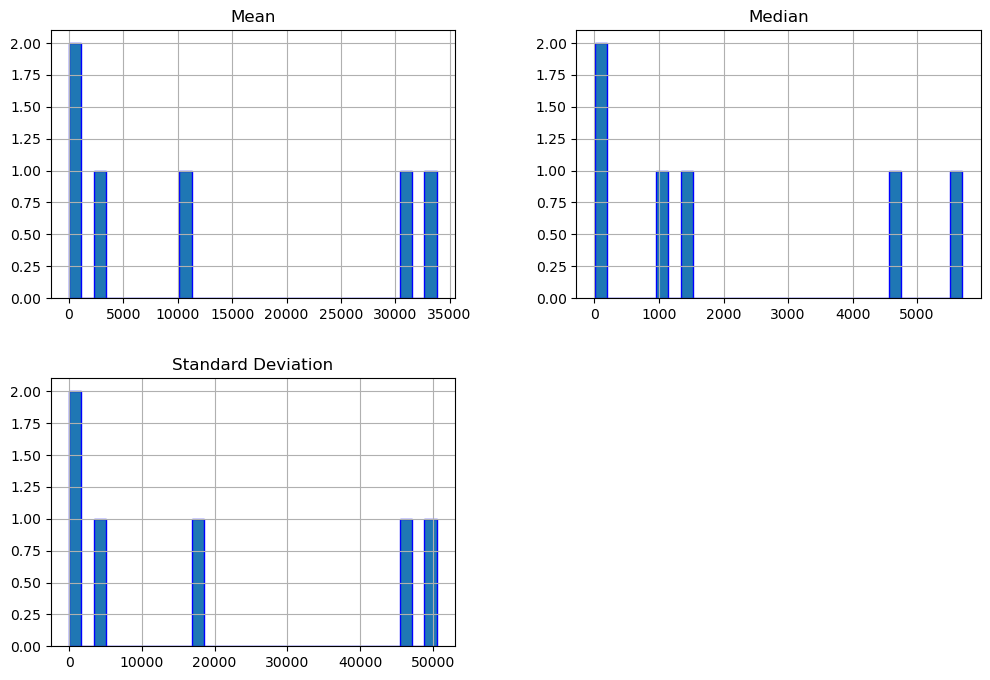

In [111]:
df[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor="blue")
plt.title("histogram each numeric columms", fontsize=20)
plt.show()

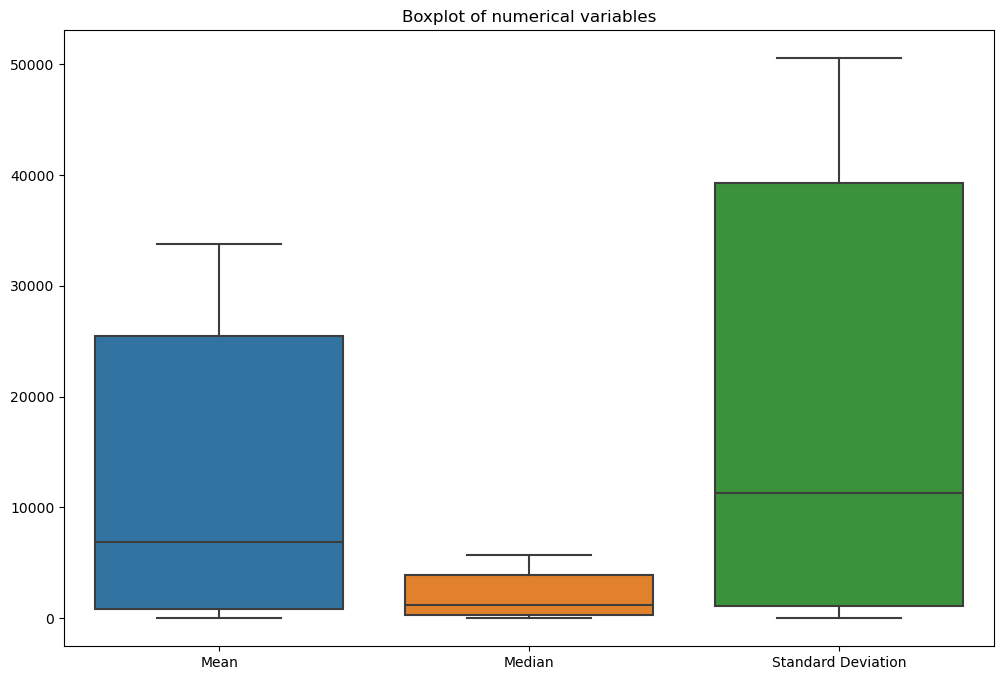

In [112]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of numerical variables")
plt.show()

In [114]:
for col in categerical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Bar Chart for {col}")
    plt.xticks(rotation=45)
    plt.show()

TypeError: unhashable type: 'list'

<Figure size 800x500 with 0 Axes>

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization
df_standardized = df.copy()  # Create a copy to keep the original data
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print mean and standard deviation after standardization
print("Mean after standardization:\n", df_standardized[numerical_cols].mean())
print("\nStandard deviation after standardization:\n", df_standardized[numerical_cols].std())


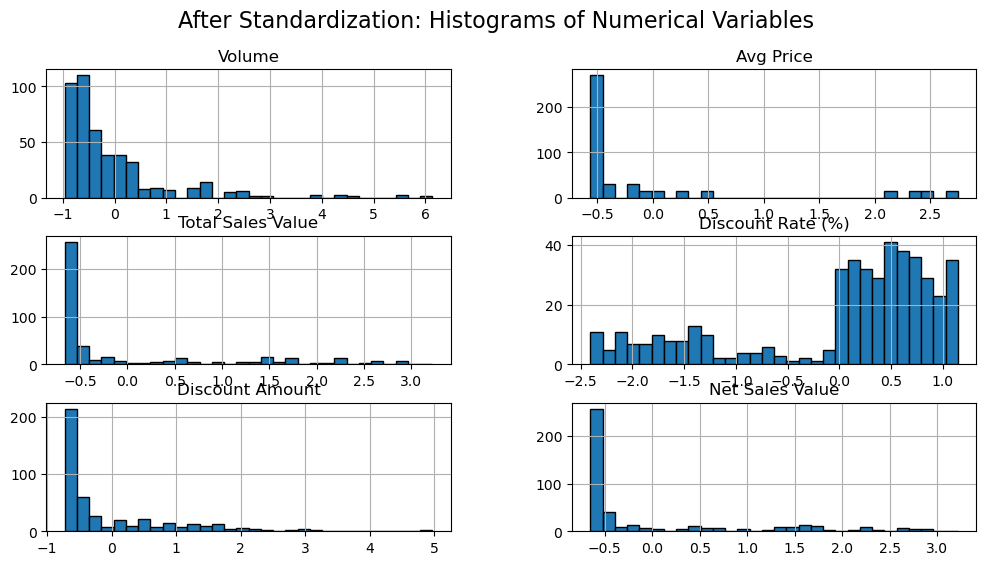

In [30]:
df_standardized[numerical_cols].hist(figsize=(12, 6), bins=30, edgecolor="black")
plt.suptitle("After Standardization: Histograms of Numerical Variables", fontsize=16)
plt.show()

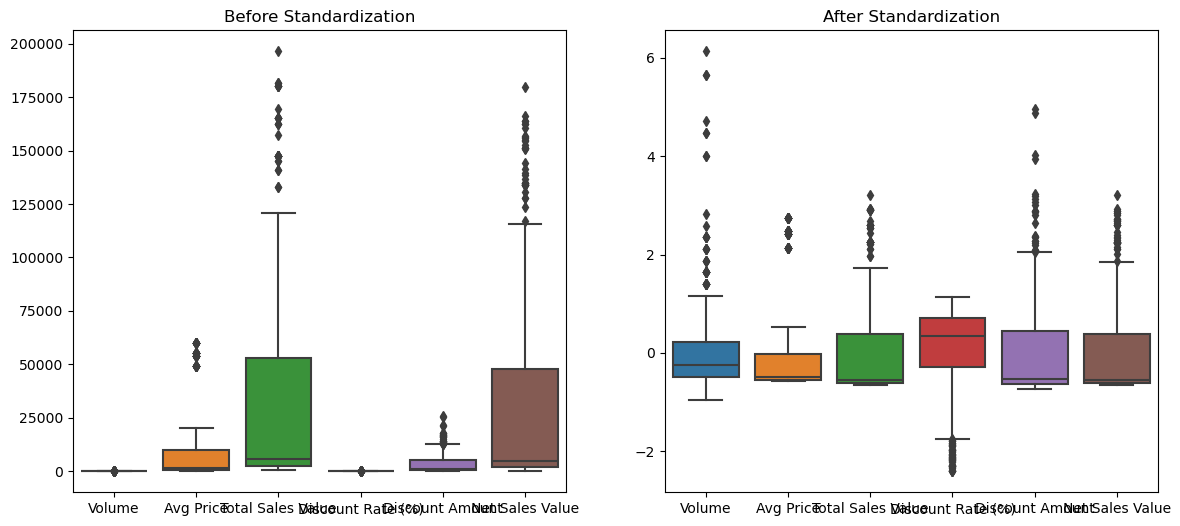

In [32]:
plt.figure(figsize=(14, 6))

# Original data boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numerical_cols])
plt.title("Before Standardization")

# Standardized data boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_standardized[numerical_cols])
plt.title("After Standardization")

plt.show()